In [35]:
import os
import gym
import gym_donkeycar
import numpy as np
import tensorflow
import shimmy
import math
from rich.live import Live
import stable_baselines3
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3 import PPO, SAC, TD3
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [36]:
folder = "/mnt/d/donkeycar_model/"
models = list(os.listdir(folder))
print(models)

['pictures', 'PPO', 'PPO2', 'PPO3', 'PPO4', 'SAC', 'SAC2', 'SAC3', 'TD3', 'videos']


In [37]:
num = []
for m in models:
    if m == "pictures" or m == "videos": continue
    os.chdir(folder + m)
    num.append( int((math.ceil(len(os.listdir(os.getcwd()))/2))*2500) )
print(num)

[117500, 22500, 145000, 142500, 100000, 157500, 100000, 35000]


In [39]:
DONKEY_GYM = True
DONKEY_SIM_PATH = "remote"
DONKEY_GYM_ENV_NAME = "donkey-generated-track-v0"
body_style = "car01"
body_rgb = (128, 128, 128)
car_name = "video"
font_size = 100
WEB_CONTROL_PORT = int(os.getenv("WEB_CONTROL_PORT", 8887))
port = 9091

conf = { "DONKEY_GYM":DONKEY_GYM, "DONKEY_SIM_PATH":DONKEY_SIM_PATH, "DONKEY_GYM_ENV_NAME":DONKEY_GYM_ENV_NAME, 
         "body_style":body_style, "body_rgb":body_rgb, "car_name":car_name, "font_size":font_size, 
         "WEB_CONTROL_PORT" : WEB_CONTROL_PORT, "port" : port }

INFO:gym_donkeycar.core.client:connecting to localhost:9091 
/home/user/miniconda3/envs/donkey/lib/python3.11/site-packages/gym/spaces/box.py:78: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
INFO:gym_donkeycar.envs.donkey_sim:on need car config
INFO:gym_donkeycar.envs.donkey_sim:sending car config.
INFO:gym_donkeycar.envs.donkey_sim:sim started!


starting DonkeyGym env


INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
INFO:matplotlib.animation:MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 640x480 -pix_fmt rgba -framerate 100.0 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y /mnt/d/donkeycar_model/videos/PPO_100000.mp4


-1.000000832802747


INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
INFO:matplotlib.animation:MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 640x480 -pix_fmt rgba -framerate 100.0 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y /mnt/d/donkeycar_model/videos/PPO3_100000.mp4


144.07235798117628


INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
INFO:matplotlib.animation:MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 640x480 -pix_fmt rgba -framerate 100.0 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y /mnt/d/donkeycar_model/videos/PPO4_100000.mp4


-1.0000011924053454


INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
INFO:matplotlib.animation:MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 640x480 -pix_fmt rgba -framerate 100.0 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y /mnt/d/donkeycar_model/videos/SAC_100000.mp4


140.83909377840922


INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
INFO:matplotlib.animation:MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 640x480 -pix_fmt rgba -framerate 100.0 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y /mnt/d/donkeycar_model/videos/SAC2_100000.mp4


159.98009562122564


INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
INFO:matplotlib.animation:MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 640x480 -pix_fmt rgba -framerate 100.0 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y /mnt/d/donkeycar_model/videos/SAC3_100000.mp4


146.3835995708565


INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
INFO:matplotlib.animation:MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 640x480 -pix_fmt rgba -framerate 100.0 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y /mnt/d/donkeycar_model/videos/TD3_35000.mp4


6.873953336829429


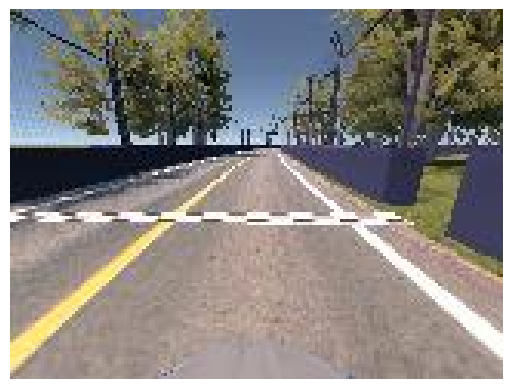

In [77]:
# make all algorithms last model's video
env = gym.make("donkey-minimonaco-track-v0", conf=conf)
for ind in range(len(num)):
    if models[ind+1] == "PPO2": continue
    os.chdir(folder + models[ind+1])
    if num[ind] > 100000: dirnum = 100000
    else: dirnum = num[ind]
    directory = os.getcwd() + f'/{dirnum}.pth'
    if "PPO" in models[ind+1]: test_model = PPO.load(directory)
    elif "SAC" in models[ind+1]: test_model = SAC.load(directory)
    elif "TD3" in models[ind+1]: test_model = TD3.load(directory)
    obs = env.reset()
    tem = 0
    video = []
    while True:
        video.append(obs)
        action, _states = test_model.predict(obs, deterministic=True)
        obs, reward, done, info = env.step(action)
        # print (reward, done)
        env.render()
        tem += reward
        if done: break
    print(tem)

    patch = plt.imshow(video[0])
    plt.axis('off')
    def animate(i):
        patch.set_data(video[i])
    anim = animation.FuncAnimation(plt.gcf(), animate, frames=len(video), interval=10)
    anim.save(f'{folder}videos/{models[ind+1]}_{dirnum}.mp4')

In [48]:
# PPO2 22500
env = gym.make("donkey-minimonaco-track-v0", conf=conf)
os.chdir(folder + "PPO2")
directory = os.getcwd() + f'/{num[1]}.pth'
test_model = PPO.load(directory)
obs = env.reset()
tem = 0
video = []
while True:
    video.append(obs)
    action, _states = test_model.predict(obs, deterministic=True)
    obs, reward, done, info = env.step(action)
    # print (reward, done)
    env.render()
    tem += reward
    if done: break
print(tem)

INFO:gym_donkeycar.core.client:connecting to localhost:9091 


starting DonkeyGym env
loading scene mini_monaco


INFO:gym_donkeycar.envs.donkey_sim:on need car config
INFO:gym_donkeycar.envs.donkey_sim:sending car config.
INFO:gym_donkeycar.envs.donkey_sim:sim started!
INFO:gym_donkeycar.envs.donkey_sim:New lap time: 29.94 seconds
INFO:gym_donkeycar.envs.donkey_sim:New lap time: 29.5 seconds
INFO:gym_donkeycar.envs.donkey_sim:New lap time: 29.45 seconds
INFO:gym_donkeycar.envs.donkey_sim:New lap time: 29.48 seconds
INFO:gym_donkeycar.envs.donkey_sim:New lap time: 29.47 seconds
INFO:gym_donkeycar.envs.donkey_sim:New lap time: 29.29 seconds
INFO:gym_donkeycar.envs.donkey_sim:New lap time: 29.38 seconds
INFO:gym_donkeycar.envs.donkey_sim:New lap time: 29.43 seconds
INFO:gym_donkeycar.envs.donkey_sim:New lap time: 29.4 seconds
INFO:gym_donkeycar.envs.donkey_sim:New lap time: 29.41 seconds
INFO:gym_donkeycar.envs.donkey_sim:New lap time: 29.66 seconds
INFO:gym_donkeycar.envs.donkey_sim:New lap time: 29.5 seconds
INFO:gym_donkeycar.envs.donkey_sim:New lap time: 29.28 seconds
INFO:gym_donkeycar.envs.don

KeyboardInterrupt: 

INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
INFO:matplotlib.animation:MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 640x480 -pix_fmt rgba -framerate 100.0 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y /mnt/d/donkeycar_model/videos/PPO2_22500.mp4


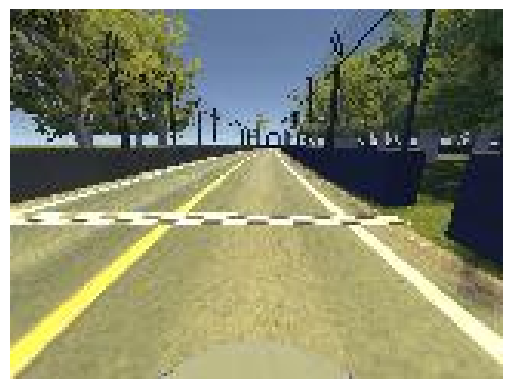

In [49]:
patch = plt.imshow(video[0])
plt.axis('off')
def animate(i):
    patch.set_data(video[i])
anim = animation.FuncAnimation(plt.gcf(), animate, frames=len(video), interval=10)
anim.save(f'{folder}videos/PPO2_{num[1]}.mp4')

In [50]:
env.close()

INFO:gym_donkeycar.core.client:connecting to localhost:9091 
/home/user/miniconda3/envs/donkey/lib/python3.11/site-packages/gym/spaces/box.py:78: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
INFO:gym_donkeycar.envs.donkey_sim:on need car config
INFO:gym_donkeycar.envs.donkey_sim:sending car config.
INFO:gym_donkeycar.envs.donkey_sim:sim started!


starting DonkeyGym env


INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
INFO:matplotlib.animation:MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 640x480 -pix_fmt rgba -framerate 100.0 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y /mnt/d/donkeycar_model/videos/PPO4_22500.mp4


132.3017148507739


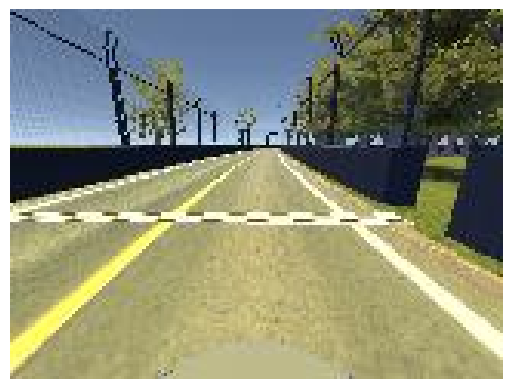

In [101]:
# PPO4 22500
env = gym.make("donkey-minimonaco-track-v0", conf=conf)
os.chdir(folder + "PPO4")
directory = os.getcwd() + f'/22500.pth'
test_model = PPO.load(directory)
obs = env.reset()
tem = 0
video = []
while True:
    video.append(obs)
    action, _states = test_model.predict(obs, deterministic=True)
    obs, reward, done, info = env.step(action)
    # print (reward, done)
    env.render()
    tem += reward
    if done: break
print(tem)

patch = plt.imshow(video[0])
plt.axis('off')
def animate(i):
    patch.set_data(video[i])
anim = animation.FuncAnimation(plt.gcf(), animate, frames=len(video), interval=10)
anim.save(f'{folder}videos/PPO4_22500.mp4')
env.close()

INFO:gym_donkeycar.core.client:connecting to localhost:9091 
/home/user/miniconda3/envs/donkey/lib/python3.11/site-packages/gym/spaces/box.py:78: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


starting DonkeyGym env
loading scene mini_monaco


INFO:gym_donkeycar.envs.donkey_sim:on need car config
INFO:gym_donkeycar.envs.donkey_sim:sending car config.
INFO:gym_donkeycar.envs.donkey_sim:sim started!
INFO:gym_donkeycar.envs.donkey_sim:New lap time: 31.41 seconds
INFO:gym_donkeycar.envs.donkey_sim:New lap time: 30.11 seconds
INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
INFO:matplotlib.animation:MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 640x480 -pix_fmt rgba -framerate 100.0 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y /mnt/d/donkeycar_model/videos/PPO3_25000.mp4


2254.361826311054


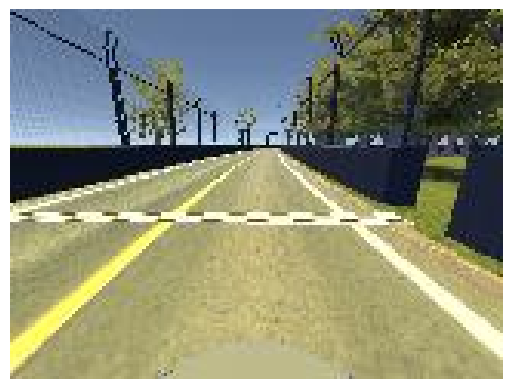

In [97]:
# PPO3 25000
env = gym.make("donkey-minimonaco-track-v0", conf=conf)
os.chdir(folder + "PPO3")
directory = os.getcwd() + f'/25000.pth'
test_model = PPO.load(directory)
obs = env.reset()
tem = 0
video = []
while True:
    video.append(obs)
    action, _states = test_model.predict(obs, deterministic=True)
    obs, reward, done, info = env.step(action)
    # print (reward, done)
    env.render()
    tem += reward
    if done: break
print(tem)

patch = plt.imshow(video[0])
plt.axis('off')
def animate(i):
    patch.set_data(video[i])
anim = animation.FuncAnimation(plt.gcf(), animate, frames=len(video), interval=10)
anim.save(f'{folder}videos/PPO3_25000.mp4')
env.close()